IRIS FLOWER CLASSIFICATION USING ML

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

IMPORTING DATA


In [12]:
column_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
df=pd.read_csv('/content/iris.data',header=None,names=column_names)

EXPLORATORY DATA ANALYSIS(EDA)

In [13]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [15]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

In [16]:
df.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
class            3
dtype: int64

In [17]:
df.shape

(150, 5)

<Axes: >

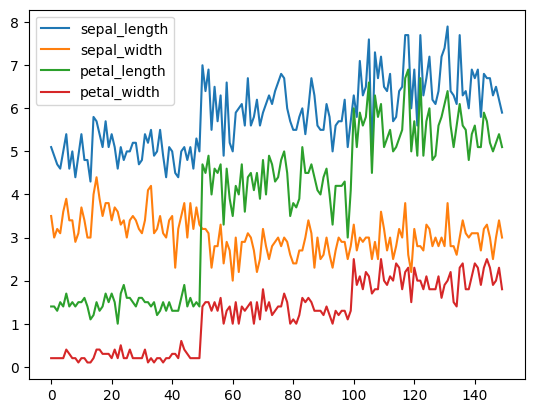

In [18]:
df.plot()

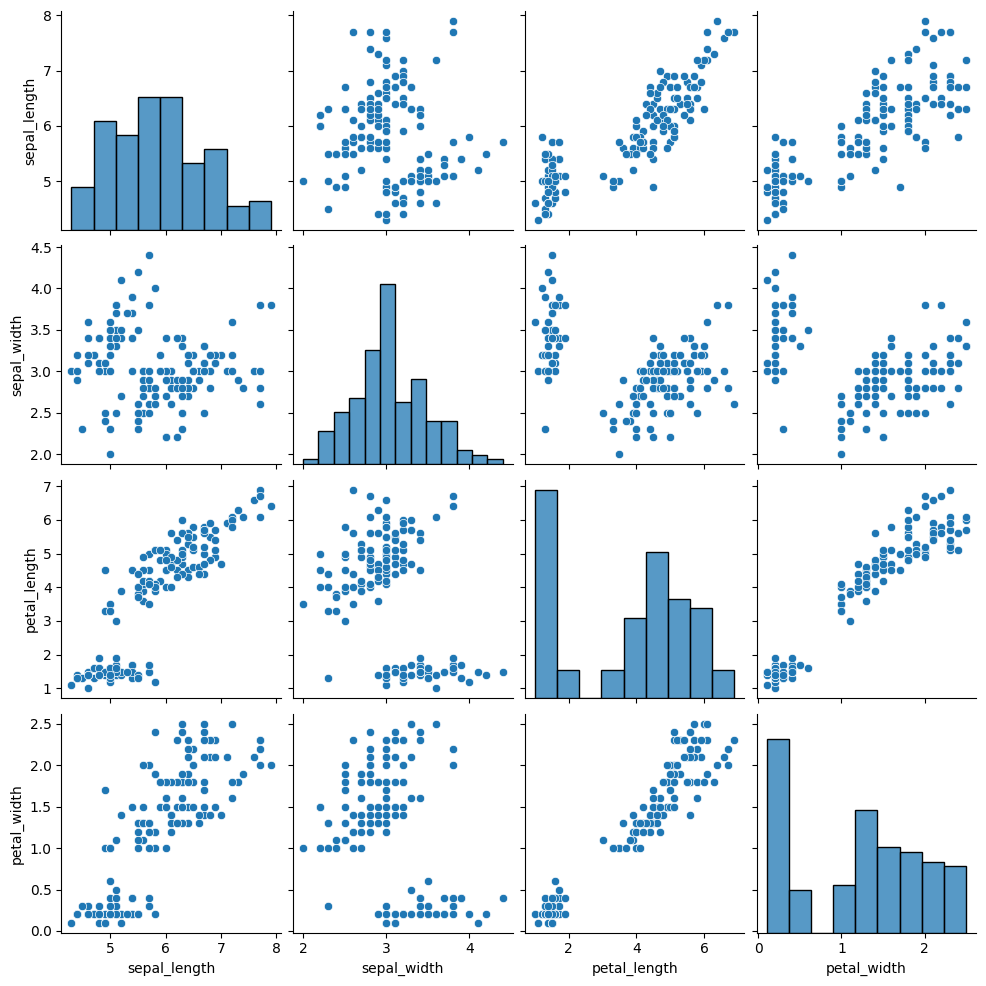

In [19]:
sns.pairplot(df)

SETTING THE TARGET VARIABLE

In [20]:
X=df.drop('class',axis=1)
y=df['class']

SPLITTING THE TRAIN AND TEST DATA

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

STANDARDISING THE DATA

In [22]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

TAKING A SUPERVISED ML MODEL AND FITTING THE DATA AND PREDICTING THE OUTCOME


In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

PERFORMANCE METRICS OF THE MODEL

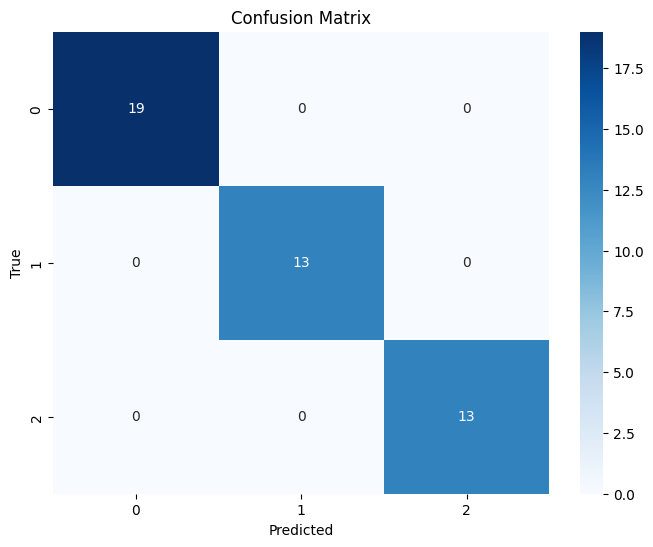

In [25]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [28]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("The accuracy of the model is:",accuracy*100)

The accuracy of the model is: 100.0
